# Diffusion Limited Aggregation 

In this lab, you will edit a code that simulates the 2D diffusion of particles and their aggregation.
Each particle performs a random walk until it gets stuck on the substrate, or on one of the forming
dendrites. You should understand why different growth mechanisms lead to two so different
pictures shown here:

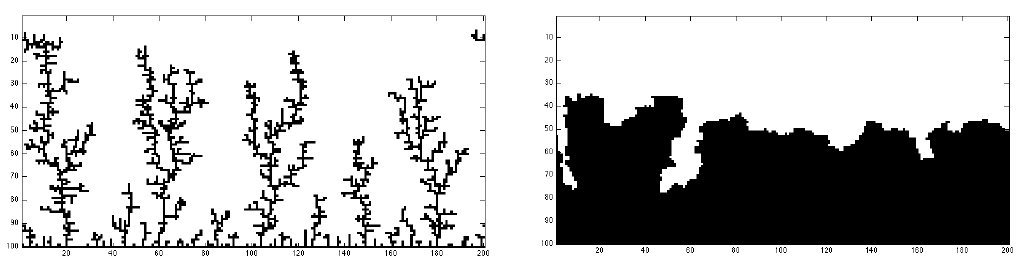

(1) Please download the DLA.ipynb notebook from bCourses and familiarize yourself with all parts. Please pay attention to the 2D array A(x,y) and understand what the ranges maxX and maxY mean. Part I is essentially above filling in the … blanks in order to obtain a working code.

(2) First please write the code for the diffusion step. Depending on the random value, r, please have the moving particle go left, right, up, or down each with a 25% probability.

(3) Right below in the file apply periodic boundary conditions in x direction. If the particle has left the simulation cell on the left, let it reappear on the right, and vice versa.

(4) In the following section, your need to determine whether any of the four neighboring sites are filled. The variables xp, xm, yp, and ym are defined for your convenience. Again apply periodic boundary conditions to xm and xp. Can you think of a reason why we do not have to worry about periodic boundary conditions in Y direction?
(5) Run the code and see what happens.

(6) The code will stop earlier than anticipated because there is not enough space to accommodate 10,000 particles. Please increase maxX and maxY until there is sufficient space for all of them.

(7) The growing dendrites compete for new particles like trees compete for sunlight. Not all dendrites make it. So please make incremental adjustments to maxX and maxY so there is just one surviving tree when the last of the 10,000 particles has been attached. This completes part I.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
#note, this function expects a matrix A[ix,iy] 
#and then displays so that A[:,0] is the lowest row of pixels
def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    #Display the graphics outside of the notebook. 
    #On a PC, use '%matplotlib qt' instead.
    
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

In [76]:
nParticles = 10000
maxX = 500
maxY = 350

In [77]:
# Initialize matrix containing all 2D grid points A(x,y)
# 0 <= x < maxX
# 0 <= y < maxY
# A(x,y)=0 ... site is empty
# A(x,y)>0 ... site is filled
A = np.zeros((maxX, maxY))

# Introduce a sticky wall at the bottom 
# by filling the lowest row of pixels with particles
A[:,0] = 1
print(A.transpose())

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


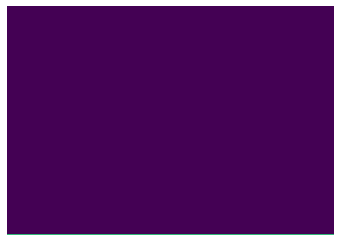

<Figure size 432x302.4 with 0 Axes>

In [78]:
#test the display routine
display(A)

In [79]:
# To save computer time, we want to inject the new particle not too far
# above growing aggregate. We inject at on a line 'yStart', which
# keeps being increased so that it is always 'yBuffer' lines above the
# highest structure
yBuffer = 5
yStart  = 1 + yBuffer

i= 0 	x=41 	y=1 	yStart=6


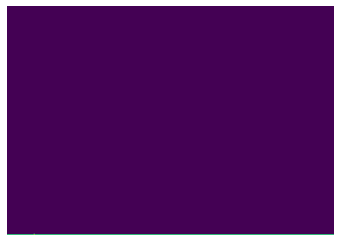

<Figure size 432x302.4 with 0 Axes>

i= 1000 	x=203 	y=5 	yStart=26


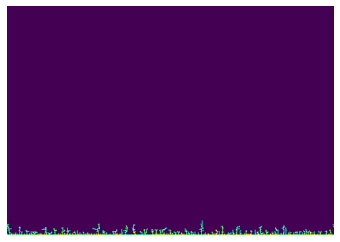

<Figure size 432x302.4 with 0 Axes>

i= 2000 	x=429 	y=30 	yStart=40


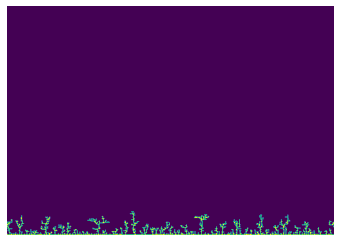

<Figure size 432x302.4 with 0 Axes>

i= 3000 	x=16 	y=40 	yStart=61


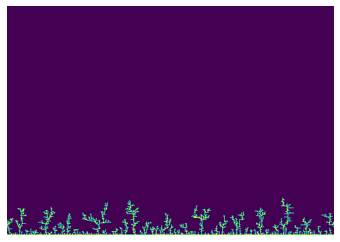

<Figure size 432x302.4 with 0 Axes>

i= 4000 	x=280 	y=53 	yStart=77


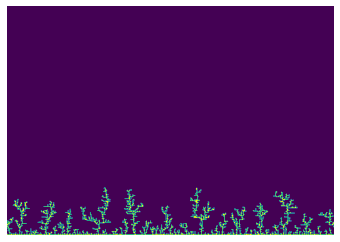

<Figure size 432x302.4 with 0 Axes>

i= 5000 	x=205 	y=75 	yStart=94


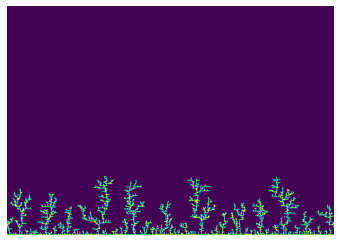

<Figure size 432x302.4 with 0 Axes>

i= 6000 	x=317 	y=76 	yStart=109


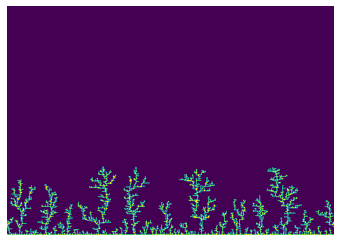

<Figure size 432x302.4 with 0 Axes>

i= 7000 	x=153 	y=107 	yStart=126


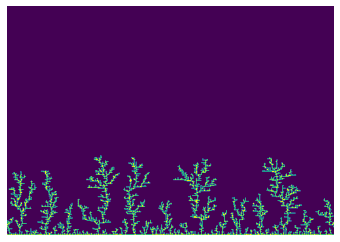

<Figure size 432x302.4 with 0 Axes>

i= 8000 	x=324 	y=110 	yStart=141


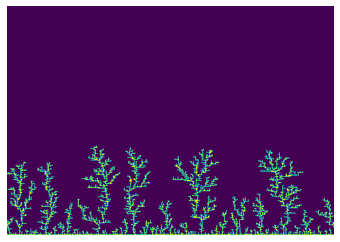

<Figure size 432x302.4 with 0 Axes>

i= 9000 	x=124 	y=140 	yStart=161


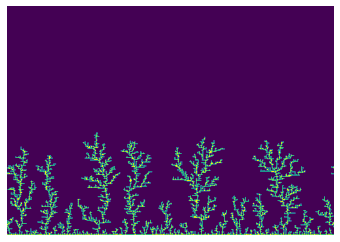

<Figure size 432x302.4 with 0 Axes>

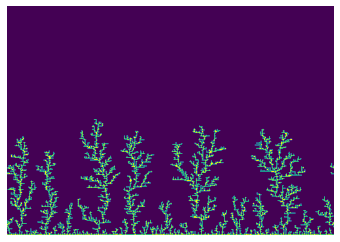

<Figure size 432x302.4 with 0 Axes>

In [80]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if 0 <= r < 0.25:
            x = x + 1
        elif 0.25 <= r < 0.5:
            x = x - 1
        elif 0.5 <= r < 0.75:
            y = y + 1
        else:
            y = y - 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = x + maxX
        elif x >= maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x + 1 + maxX) % maxX
        xm = (x - 1 + maxX) % maxX
        yp = y
        ym = y

        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if (A[xp, yp] == 1 or A[xm, ym] == 1 or A[x, y-1] == 1):
            A[x,y] = 1
            if (y+yBuffer>yStart and y+yBuffer<maxY): 
                yStart = y+yBuffer

            if (i%1000==0): 
                print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

            nNewParticlesPerFrame = 1000 
            if (i%nNewParticlesPerFrame==0): 
                display(A)
                
            break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
        

Part 2

Part II: Imagine a stream of particles through a pipe with a sticky lower surface. To simulate a flow in a very simple way, I suggest altering the diffusion probability in the X directions so that the particle moves to the right with 40% probability, with only 10% probability to the left. Leave
the probability for the vertical motion unchanged at 25%. Reset maxX and maxY to your values from section (6). Run your code again and determine whether the dendrites grow with the stream (like stalactites) or against it (like stalagmites). Give an interpretation for your observations!

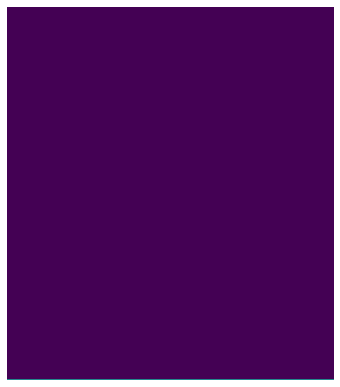

<Figure size 432x493.714 with 0 Axes>

In [81]:
nParticles = 10000
maxX = 700
maxY = 800
A = np.zeros((maxX, maxY))
A[:,0] = 1
yBuffer = 5
yStart  = 1 + yBuffer
display(A)

i= 0 	x=320 	y=1 	yStart=6


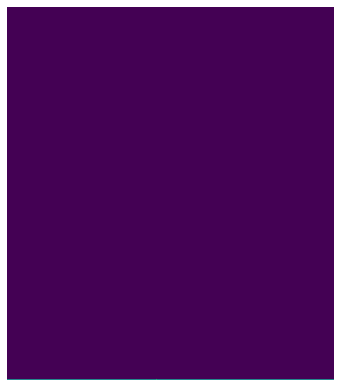

<Figure size 432x493.714 with 0 Axes>

i= 1000 	x=693 	y=7 	yStart=30


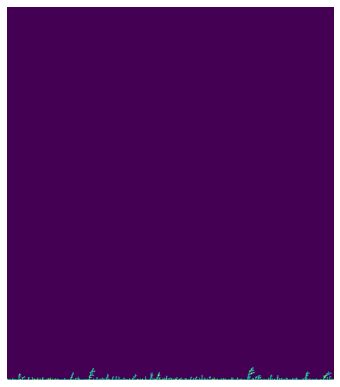

<Figure size 432x493.714 with 0 Axes>

i= 2000 	x=569 	y=55 	yStart=91


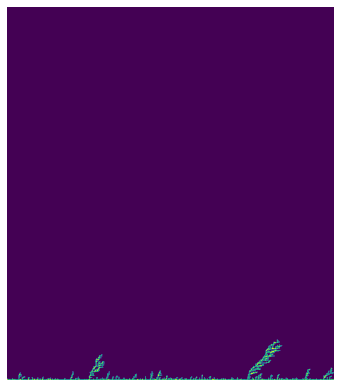

<Figure size 432x493.714 with 0 Axes>

i= 3000 	x=651 	y=132 	yStart=144


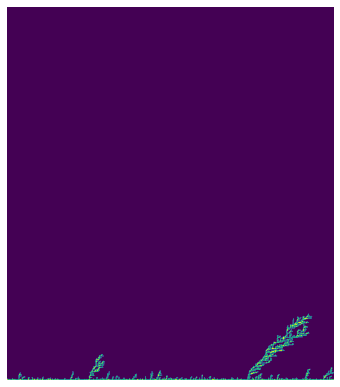

<Figure size 432x493.714 with 0 Axes>

i= 4000 	x=23 	y=190 	yStart=217


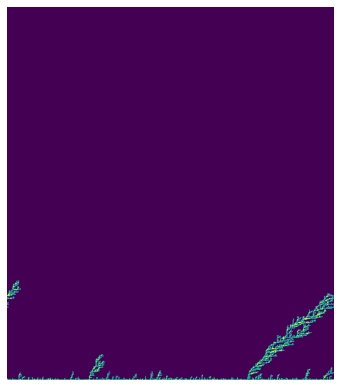

<Figure size 432x493.714 with 0 Axes>

i= 5000 	x=65 	y=217 	yStart=277


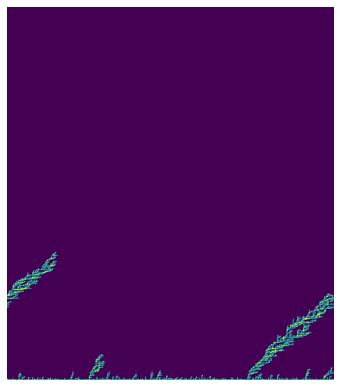

<Figure size 432x493.714 with 0 Axes>

i= 6000 	x=187 	y=308 	yStart=334


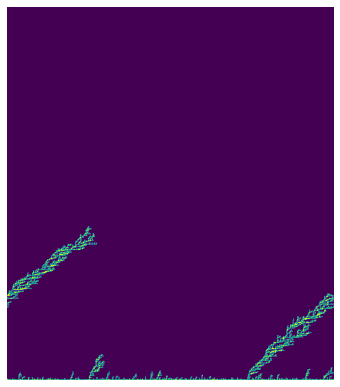

<Figure size 432x493.714 with 0 Axes>

i= 7000 	x=251 	y=379 	yStart=386


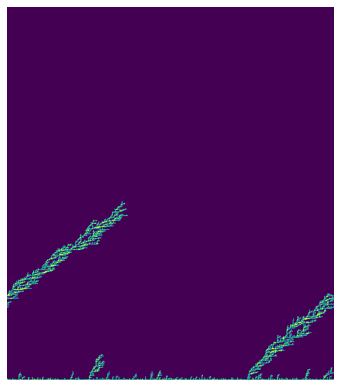

<Figure size 432x493.714 with 0 Axes>

i= 8000 	x=307 	y=426 	yStart=444


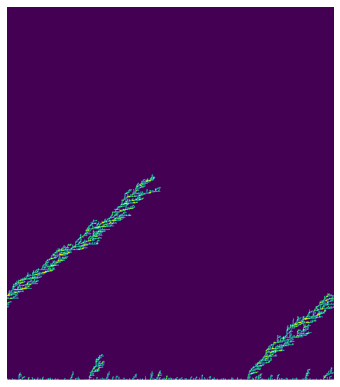

<Figure size 432x493.714 with 0 Axes>

i= 9000 	x=389 	y=487 	yStart=513


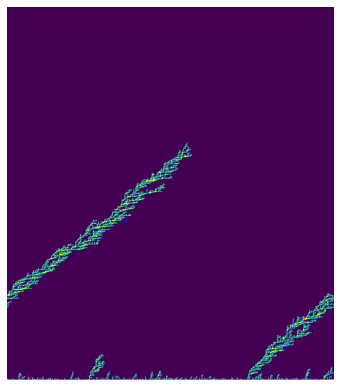

<Figure size 432x493.714 with 0 Axes>

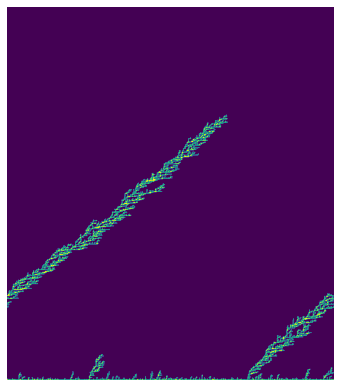

<Figure size 432x493.714 with 0 Axes>

In [82]:
for i in range(0,nParticles):

    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if 0 <= r < 0.1:
            x = x + 1
        elif 0.1 <= r < 0.5:
            x = x - 1
        elif 0.5 <= r < 0.75:
            y = y + 1
        else:
            y = y - 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = x + maxX
        elif x >= maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x + 1 + maxX) % maxX
        xm = (x - 1 + maxX) % maxX
        yp = y
        ym = y

        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if (A[xp, yp] == 1 or A[xm, ym] == 1 or A[x, y-1] == 1):
            A[x,y] = 1
            if (y+yBuffer>yStart and y+yBuffer<maxY):
                if r < 0.5:
                    yStart = y+yBuffer

            if (i%1000==0): 
                print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

            nNewParticlesPerFrame = 1000 
            if (i%nNewParticlesPerFrame==0): 
                display(A)
                
            break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
        

As you can see in the result, the particle will turn out all aggregate on the main branch. The reason why it will not go to the other place is that: when we find a place to stick a particle, and we increase the particle release height, when the particle moving down, the probability of moving right is 40%, which make the particle moves right for most case, therefore the particle will stick on the main branch.

Part 3

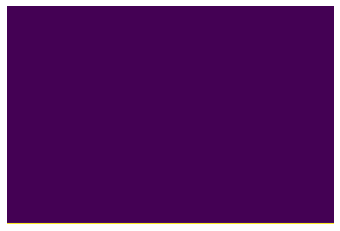

<Figure size 432x288 with 0 Axes>

In [83]:
nParticles = 10000
maxX = 300
maxY = 200
A = np.zeros((maxX, maxY))
A[:,0] = 1
yBuffer = 5
yStart  = 1 + yBuffer
display(A)

p = 0.03

i= 0 	x=234 	y=1 	yStart=6


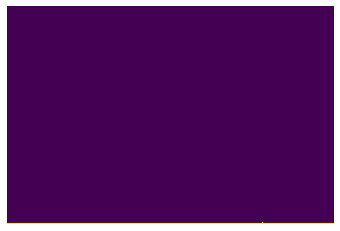

<Figure size 432x288 with 0 Axes>

i= 1000 	x=128 	y=4 	yStart=17


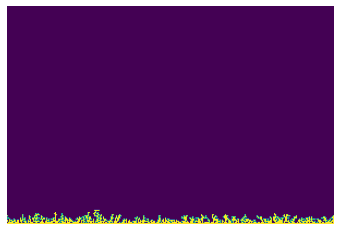

<Figure size 432x288 with 0 Axes>

i= 2000 	x=264 	y=12 	yStart=26


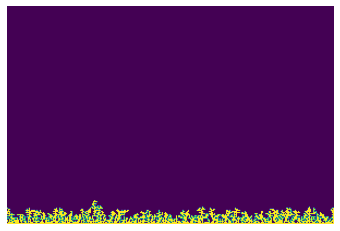

<Figure size 432x288 with 0 Axes>

i= 3000 	x=295 	y=19 	yStart=38


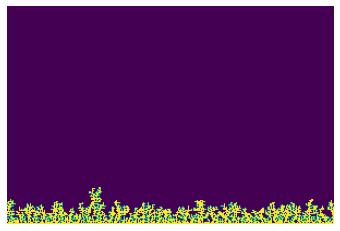

<Figure size 432x288 with 0 Axes>

i= 4000 	x=123 	y=20 	yStart=46


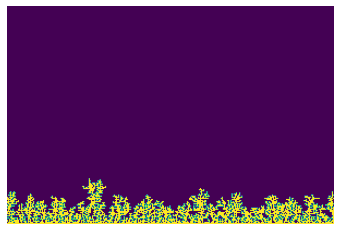

<Figure size 432x288 with 0 Axes>

i= 5000 	x=280 	y=34 	yStart=53


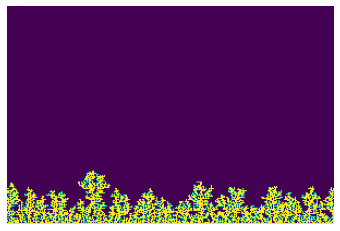

<Figure size 432x288 with 0 Axes>

i= 6000 	x=103 	y=31 	yStart=62


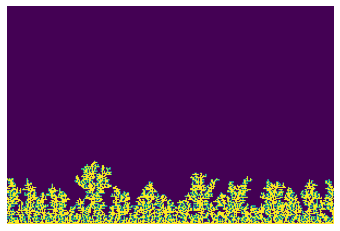

<Figure size 432x288 with 0 Axes>

i= 7000 	x=217 	y=44 	yStart=69


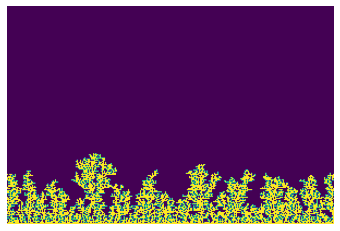

<Figure size 432x288 with 0 Axes>

i= 8000 	x=65 	y=69 	yStart=76


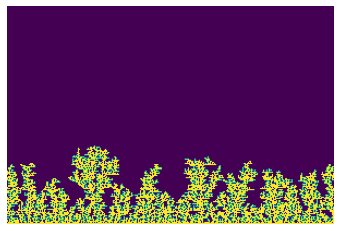

<Figure size 432x288 with 0 Axes>

i= 9000 	x=250 	y=46 	yStart=84


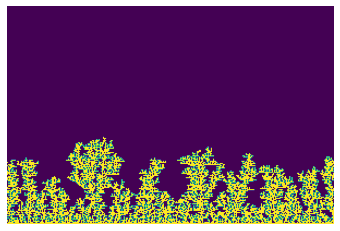

<Figure size 432x288 with 0 Axes>

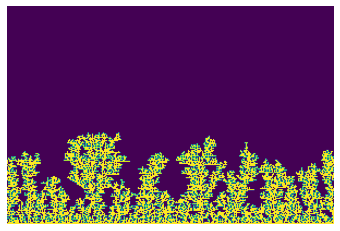

<Figure size 432x288 with 0 Axes>

In [84]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if 0 <= r < 0.25:
            x = x + 1
        elif 0.25 <= r < 0.5:
            x = x - 1
        elif 0.5 <= r < 0.75:
            y = y + 1
        else:
            y = y - 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = x + maxX
        elif x >= maxX:
            x = x - maxX
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x + 1 + maxX) % maxX
        xm = (x - 1 + maxX) % maxX
        yp = y
        ym = y

        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if (A[xp, yp] == 1 or A[xm, ym] == 1 or A[x, y-1] == 1):
            m = np.random.random()
            if m < p:
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                    
                break # particle was attached, break out of current loop and insert next one
            else:
                continue
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')
        break

display(A)
        

The result above is choosing p = 0.03